# Steam Store Games_first version_by songheeNoh

---

## 1. 데이터 분석 준비하기

### Import Modules

In [18]:
# numpy
import numpy as np

# pandas
import pandas as pd

# seaborn
import seaborn as sns

#matplotlibb
import matplotlib.pyplot as plt
%matplotlib inline

palette = sns.color_palette("Blues_d")
default_color = palette[2]

In [4]:
# 빨간 warning message를 보고싶지 않다면
import warnings
warnings.filterwarnings('ignore')

### Load Dataset

In [5]:
# read_csv로 csv 파일을 불러옵니다.pandas를 활용해 데이터를 가져와보도록 하겠습니다.
steam = pd.read_csv('steam.csv')

# 데이터프레임의 크기를 확인합니다.
print(steam.shape)

# 데이터프레임 상위 5개 값 확인
steam.head()

(27075, 18)


,appid,name,release_date,english,developer,publisher,platforms,required_age,categories,genres,steamspy_tags,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,owners,price
0,10,Counter-Strike,2000-11-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,124534,3339,17612,317,10000000-20000000,7.19
1,20,Team Fortress Classic,1999-04-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,3318,633,277,62,5000000-10000000,3.99
2,30,Day of Defeat,2003-05-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Valve Anti-Cheat enabled,Action,FPS;World War II;Multiplayer,0,3416,398,187,34,5000000-10000000,3.99
3,40,Deathmatch Classic,2001-06-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,1273,267,258,184,5000000-10000000,3.99
4,50,Half-Life: Opposing Force,1999-11-01,1,Gearbox Software,Valve,windows;mac;linux,0,Single-player;Multi-player;Valve Anti-Cheat en...,Action,FPS;Action;Sci-fi,0,5250,288,624,415,5000000-10000000,3.99


### dataset info

In [6]:
steam.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27075 entries, 0 to 27074
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   appid             27075 non-null  int64  
 1   name              27075 non-null  object 
 2   release_date      27075 non-null  object 
 3   english           27075 non-null  int64  
 4   developer         27075 non-null  object 
 5   publisher         27075 non-null  object 
 6   platforms         27075 non-null  object 
 7   required_age      27075 non-null  int64  
 8   categories        27075 non-null  object 
 9   genres            27075 non-null  object 
 10  steamspy_tags     27075 non-null  object 
 11  achievements      27075 non-null  int64  
 12  positive_ratings  27075 non-null  int64  
 13  negative_ratings  27075 non-null  int64  
 14  average_playtime  27075 non-null  int64  
 15  median_playtime   27075 non-null  int64  
 16  owners            27075 non-null  object

### Create additional features

In [67]:
steam = steam.assign(**{'overall_reviews':steam.positive_ratings + steam.negative_ratings})
steam = steam.assign(**{'positive_rate':steam.positive_ratings / steam.overall_reviews})
# release_date 날짜 형식으로 변경
steam['release_date'] = pd.to_datetime(steam['release_date'])
steam.head()

,appid,name,release_date,english,developer,publisher,platforms,required_age,categories,genres,...,Multi-player,MMO,Partial Controller Support,Stats,Valve Anti-Cheat enabled,windows,linux,mac,overall_reviews,positive_rate
0,10,Counter-Strike,2000-11-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,...,True,False,False,False,True,True,True,True,127873,0.973888
1,20,Team Fortress Classic,1999-04-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,...,True,False,False,False,True,True,True,True,3951,0.839787
2,30,Day of Defeat,2003-05-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Valve Anti-Cheat enabled,Action,...,True,False,False,False,True,True,True,True,3814,0.895648
3,40,Deathmatch Classic,2001-06-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,...,True,False,False,False,True,True,True,True,1540,0.826623
4,50,Half-Life: Opposing Force,1999-11-01,1,Gearbox Software,Valve,windows;mac;linux,0,Single-player;Multi-player;Valve Anti-Cheat en...,Action,...,True,False,False,False,True,True,True,True,5538,0.947996


---

## 2. 데이터 분석하기

### Platforms

In [29]:
platform_set = set()
for i in steam.platforms.str.split(';'):
    platform_set.update(i)
platform_set

{'linux', 'mac', 'windows'}

In [31]:
platform_sets = steam.platforms.str.split(';').apply(set)
d = dict()
d['windows'] = platform_sets.apply(lambda row: 'windows' in row)
d['linux'] = platform_sets.apply(lambda row: 'linux' in row)
d['mac'] = platform_sets.apply(lambda row: 'mac' in row)
steam = steam.assign(**d)

In [32]:
platforms_count = steam[steam.columns & platform_set].sum()
platforms_count = platforms_count.sort_values(ascending=False)
platforms_count / len(steam)

windows    0.999815
mac        0.297913
linux      0.193352
dtype: float64

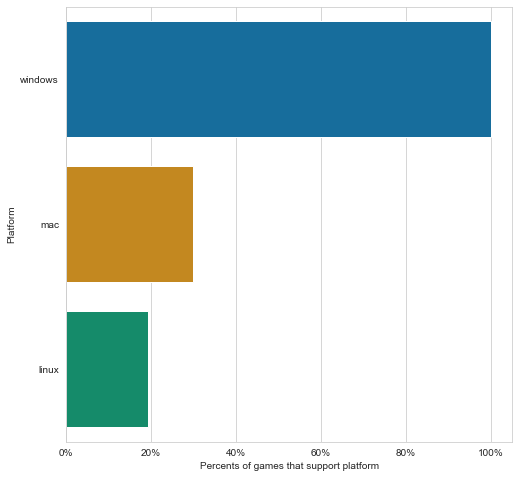

In [35]:
plt.figure(figsize=(8,8))

with sns.color_palette("colorblind"):
    g = sns.barplot(y=platforms_count.index, x=platforms_count / len(steam))

vals = g.get_xticks()
g.set_xticklabels(['{:,.0%}'.format(x) for x in vals])

plt.xlabel('Percents of games that support platform')
plt.ylabel('Platform')
plt.show()

### Genres

In [9]:
genres_set = set()
for i in steam.genres.str.split(';'):
    genres_set.update(i)
genres_set

{'Accounting',
 'Action',
 'Adventure',
 'Animation & Modeling',
 'Audio Production',
 'Casual',
 'Design & Illustration',
 'Documentary',
 'Early Access',
 'Education',
 'Free to Play',
 'Game Development',
 'Gore',
 'Indie',
 'Massively Multiplayer',
 'Nudity',
 'Photo Editing',
 'RPG',
 'Racing',
 'Sexual Content',
 'Simulation',
 'Software Training',
 'Sports',
 'Strategy',
 'Tutorial',
 'Utilities',
 'Video Production',
 'Violent',
 'Web Publishing'}

In [14]:
d = dict()
genre_sets = steam.genres.str.split(';').apply(set)
for genre in genres_set:
    d[genre] = genre_sets.apply(lambda row : genre in row)
steam = steam.assign(**d)

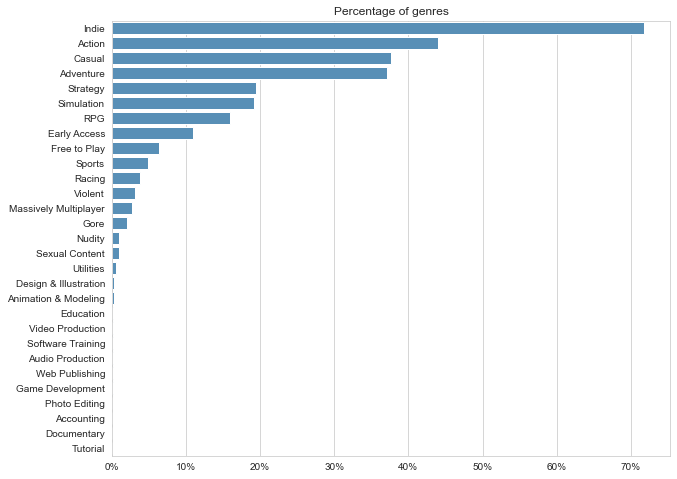

In [20]:
genres_count = steam[genres_set].sum()
genres_count = genres_count.sort_values(ascending=False)

plt.figure(figsize=(10,8))
sns.set_style("whitegrid")
g = sns.barplot(y=genres_count.index, x=genres_count/len(steam), color=default_color)

vals = g.get_xticks()
g.set_xticklabels(['{:,.0%}'.format(x) for x in vals])
g.set_title("Percentage of genres")
plt.show()

### Categories

In [21]:
categories_set = set()
for i in steam.categories.str.split(';'):
    categories_set.update(i)
categories_set

{'Captions available',
 'Co-op',
 'Commentary available',
 'Cross-Platform Multiplayer',
 'Full controller support',
 'In-App Purchases',
 'Includes Source SDK',
 'Includes level editor',
 'Local Co-op',
 'Local Multi-Player',
 'MMO',
 'Mods',
 'Mods (require HL2)',
 'Multi-player',
 'Online Co-op',
 'Online Multi-Player',
 'Partial Controller Support',
 'Shared/Split Screen',
 'Single-player',
 'Stats',
 'Steam Achievements',
 'Steam Cloud',
 'Steam Leaderboards',
 'Steam Trading Cards',
 'Steam Turn Notifications',
 'Steam Workshop',
 'SteamVR Collectibles',
 'VR Support',
 'Valve Anti-Cheat enabled'}

In [22]:
d = dict()
category_set = steam.categories.str.split(';').apply(set)
for category in categories_set:
    d[category] = category_set.apply(lambda row: category in row)
steam = steam.assign(**d)

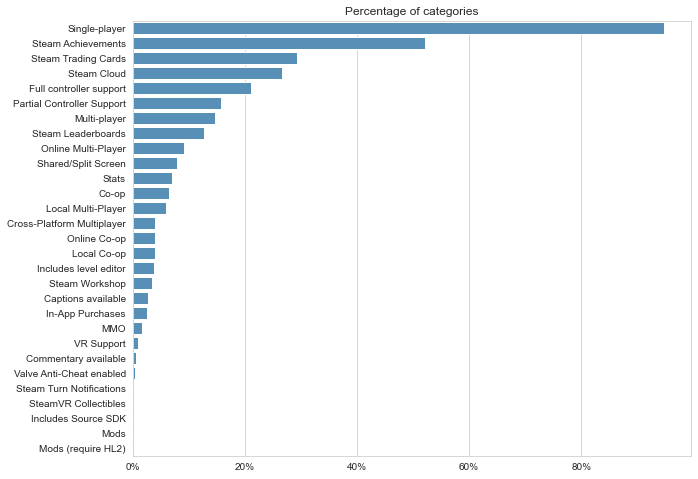

In [27]:
category_count = steam[steam.columns & categories_set].sum()
category_count = category_count.sort_values(ascending=False)

plt.figure(figsize=(10,8))
g = sns.barplot(y=category_count.index, x=category_count/len(steam), color=default_color)

vals = g.get_xticks()
g.set_xticklabels(['{:,.0%}'.format(x) for x in vals])

g.set_title("Percentage of categories")
plt.show()

### Positive rate and overall reviews

In [51]:
good_columns = ['name', 'release_date', 'developer', 'categories', 'genres',
       'average_playtime', 'owners', 'price',
       'overall_reviews', 'positive_rate']

Text(0.5, 1.0, 'Distribution of positive rate of user reviews for games with over 100 reviews')

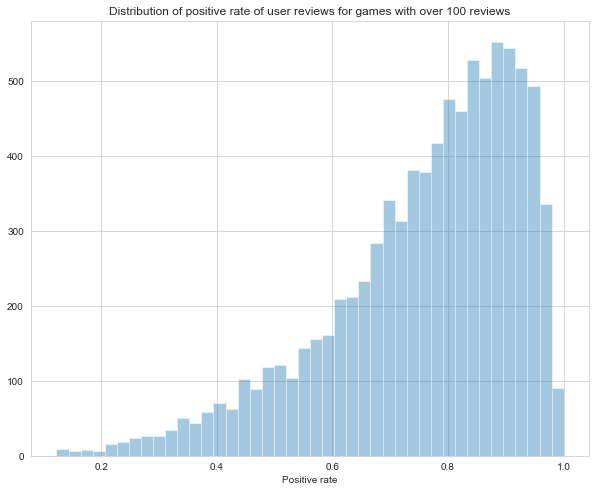

In [40]:
plt.figure(figsize=(10,8))

sns.distplot(steam[steam.overall_reviews > 100].positive_rate, kde=False);
plt.xlabel('Positive rate')
plt.title('Distribution of positive rate of user reviews for games with over 100 reviews')

### Top "Best" games with reviews > 500

In [52]:
steam[steam.overall_reviews > 500].sort_values('positive_rate', ascending=False)[good_columns].head(5)

,name,release_date,developer,categories,genres,average_playtime,owners,price,overall_reviews,positive_rate
23296,Sabbat of the Witch,2018-10-26,Yuzusoft,Single-player;Steam Achievements;Steam Trading...,Adventure;Casual;Simulation,0,0-20000,23.79,523,0.996176
14298,planetarian HD,2017-05-08,VisualArts/Key,Single-player;Steam Achievements;Steam Trading...,Adventure;Casual;Simulation,0,0-20000,6.99,937,0.989328
18404,東方天空璋 ～ Hidden Star in Four Seasons.,2017-11-17,上海アリス幻樂団,Single-player;Partial Controller Support;Steam...,Action;Indie,413,50000-100000,11.39,4167,0.987281
13727,Monolith,2017-06-07,Team D-13,Single-player;Steam Achievements;Full controll...,Action;Indie,80,20000-50000,5.59,529,0.986767
23,Portal 2,2011-04-18,Valve,Single-player;Co-op;Steam Achievements;Full co...,Action;Adventure,1102,10000000-20000000,7.19,140111,0.986504


### Top "Best" games with reviews > 100k

In [55]:
steam[steam.overall_reviews > 100000].sort_values('positive_rate', ascending=False)[good_columns].head(5)

,name,release_date,developer,categories,genres,average_playtime,owners,price,overall_reviews,positive_rate
23,Portal 2,2011-04-18,Valve,Single-player;Co-op;Steam Achievements;Full co...,Action;Adventure,1102,10000000-20000000,7.19,140111,0.986504
2964,The Witcher® 3: Wild Hunt,2015-05-18,CD PROJEKT RED,Single-player;Steam Achievements;Full controll...,RPG,3068,5000000-10000000,24.99,207728,0.976902
0,Counter-Strike,2000-11-01,Valve,Multi-player;Online Multi-Player;Local Multi-P...,Action,17612,10000000-20000000,7.19,127873,0.973888
1120,Terraria,2011-05-16,Re-Logic,Single-player;Multi-player;Online Multi-Player...,Action;Adventure;Indie;RPG,5585,5000000-10000000,6.99,263397,0.970398
7175,Stardew Valley,2016-02-26,ConcernedApe,Single-player;Multi-player;Co-op;Steam Achieve...,Indie;RPG;Simulation,2868,2000000-5000000,10.99,121978,0.969167


### Top "Worst" games with reviews > 500

In [56]:
steam[steam.overall_reviews > 500].sort_values('positive_rate', ascending=True)[good_columns].head(5)

,name,release_date,developer,categories,genres,average_playtime,owners,price,overall_reviews,positive_rate
1197,Flatout 3: Chaos & Destruction,2011-12-13,Team 6 Studios,Single-player;Multi-player;Co-op;Partial Contr...,Racing,19,200000-500000,6.99,2164,0.134011
2513,Game Tycoon 1.5,2014-02-11,Sunlight Games,Single-player;Steam Cloud,Simulation;Strategy,240,100000-200000,0.79,636,0.139937
2367,Airport Simulator 2014,2013-12-19,United Independent Entertainment GmbH,Single-player;Steam Cloud,Simulation,0,50000-100000,6.99,946,0.151163
2988,Uriel's Chasm,2014-09-12,Rail Slave Games,Single-player;Steam Trading Cards,Adventure;Casual;Indie,188,200000-500000,3.99,2765,0.169982
7449,Godus Wars,2016-02-03,22cans,Single-player;Partial Controller Support;Steam...,Casual;Indie;Simulation;Strategy;Early Access,0,100000-200000,10.99,531,0.171375


### Top "Worst" games with reviews > 100k

In [57]:
steam[steam.overall_reviews > 100000].sort_values('positive_rate', ascending=True)[good_columns].head(5)

,name,release_date,developer,categories,genres,average_playtime,owners,price,overall_reviews,positive_rate
12836,PLAYERUNKNOWN'S BATTLEGROUNDS,2017-12-21,PUBG Corporation,Multi-player;Online Multi-Player;Stats,Action;Adventure;Massively Multiplayer,22938,50000000-100000000,26.99,983260,0.504632
2563,No Man's Sky,2016-08-12,Hello Games,Single-player;Multi-player;Online Multi-Player...,Action;Adventure,2004,1000000-2000000,39.99,119932,0.529000
7809,Z1 Battle Royale,2018-02-28,NantG,Multi-player;Online Multi-Player;In-App Purchases,Action;Adventure;Free to Play;Massively Multip...,3142,10000000-20000000,0.00,203098,0.548671
1506,DayZ,2018-12-13,Bohemia Interactive,Multi-player;Online Multi-Player;Steam Worksho...,Action;Adventure;Massively Multiplayer,7235,2000000-5000000,33.99,195604,0.605484
1607,Heroes & Generals,2016-10-18,RETO MOTO,Multi-player;Online Multi-Player;MMO;Online Co...,Action;Free to Play;Indie;Massively Multiplayer,1752,10000000-20000000,0.00,100272,0.656774


### Top Playtime

In [60]:
steam.sort_values('average_playtime', ascending=False)[good_columns].head(5)

,name,release_date,developer,categories,genres,average_playtime,owners,price,overall_reviews,positive_rate
9201,The Abbey of Crime Extensum,2016-05-19,Manuel Pazos;Daniel Celemín,Single-player,Adventure;Free to Play,190625,50000-100000,0.00,168,0.869048
1478,The Banner Saga: Factions,2013-02-25,Stoic,Multi-player;Cross-Platform Multiplayer,Free to Play;Indie;RPG;Strategy,95245,200000-500000,0.00,771,0.738003
6014,The Secret of Tremendous Corporation,2015-10-12,Sebastian Krzyszkowiak;Konrad Burandt;Paweł Radej,Single-player;Captions available;Steam Cloud,Adventure;Casual;Free to Play;Indie,95242,100000-200000,0.00,268,0.813433
8969,PRICE,2016-09-15,YETU GAME,Single-player;Steam Achievements;Steam Trading...,Adventure;Casual;Indie,63481,200000-500000,0.00,4431,0.947416
3930,Boundless,2018-09-11,Wonderstruck,Multi-player;Online Multi-Player;MMO;Co-op;Onl...,Action;Adventure;Indie;Massively Multiplayer;RPG,55204,20000-50000,32.99,1639,0.703478


### Various categories and genres

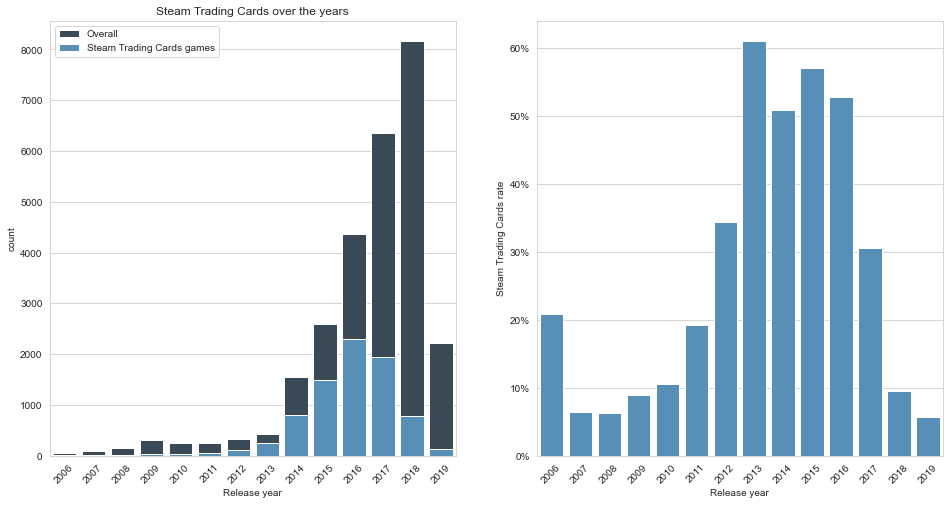

In [70]:
trunc_year = 2005
truncated_df = steam[steam.release_date.dt.year>trunc_year]

def over_the_years(steam, column_name, palette=palette, rate_lim=None):

    fig = plt.figure(figsize=(16, 8))
    
    yearly = steam.groupby(steam.release_date.dt.year.rename('release_year'))\
        .agg('count').appid.rename('count')
    p = steam.groupby(steam.release_date.dt.year)[column_name].mean()
    
    plt.subplot(121)
    g = sns.barplot(x=yearly.index, y=yearly, color=palette[5],label="Overall")
    g2 = sns.barplot(x=yearly.index, y=yearly * p, color=palette[2], label=f"{column_name} games")
    plt.legend()
    plt.xticks(rotation=45)
    plt.title(f'{column_name} over the years')
    plt.xlabel('Release year')
    
    plt.subplot(122)
    g3 = sns.barplot(x=p.index, y=p, color=palette[2])
    plt.xticks(rotation=45)
    plt.xlabel('Release year')
    plt.ylabel(f'{column_name} rate')
    if rate_lim:
        g3.set_ylim(rate_lim)
    vals = g3.get_yticks()
    g3.set_yticklabels(['{:,.0%}'.format(x) for x in vals])
    
over_the_years(truncated_df, 'Steam Trading Cards')